# Genshin Impact Character Simple Exploratory Data Analysis 

Analyzing Genshin Character using Python

# 1. Importing Necessary Libraries 
We import Pandas, Numpy, Matplotlib and Seaborn for data wrangling and visualization

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

# 2. Reading Data from File 
Let's load the data from file!

In [3]:
genshin = pd.read_csv('genshin.csv', encoding='latin-1')
genshin

,character_name,rarity,region,vision,arkhe,weapon_type,model,constellation,birthday,special_dish,affiliation,release_date,limited,voice_eng,voice_cn,voice_jp,voice_kr,ascension,ascension_specialty,ascension_material,ascension_boss,talent_material,talent_book_1-2,talent_book_2-3,talent_book_3-4,talent_book_4-5,talent_book_5-6,talent_book_6-7,talent_book_7-8,talent_book_8-9,talent_book_9-10,talent_weekly,hp_90_90,atk_90_90,def_90_90,hp_80_90,atk_80_90,def_80_90,hp_80_80,atk_80_80,...,hp_70_80,atk_70_80,def_70_80,hp_70_70,atk_70_70,def_70_70,hp_60_70,atk_60_70,def_60_70,hp_60_60,atk_60_60,def_60_60,hp_50_60,atk_50_60,def_50_60,hp_50_50,atk_50_50,def_50_50,hp_40_50,atk_40_50,def_40_50,hp_40_40,atk_40_40,def_40_40,hp_20_40,atk_20_40,def_20_40,hp_20_20,atk_20_20,def_20_20,hp_1_20,atk_1_20,def_1_20,spsecial_0,special_1,special_2,special_3,special_4,special_5,special_6
0,Albedo,5,Mondstadt,Geo,NaN,Sword,Medium Male,Princeps Cretaceus,13-Sep,Woodland Dream,Knights of Favonius,12/23/20,True,Khoi Dao,Mace,Kenji Nojima (????),Kim Myung-jun (???),Geo DMG Bonus,Cecilia,Divining Scroll,Basalt Pillar,Divining Scroll,Teachings of Ballad,Guide to Ballad,Guide to Ballad,Guide to Ballad,Guide to Ballad,Philosophies of Ballad,Philosophies of Ballad,Philosophies of Ballad,Philosophies of Ballad,Tusk of Monoceros Caeli,13226,251,876,12296,233,815,11669,222,...,10746,204,712,10119,192,670,9207,175,610,8579,163,568,7675,146,508,6839,130,453,5944,113,394,5317,101,352,3554,68,235,2671,51,177,1030,20,68,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
1,Alhaitham,5,Sumeru,Dendro,NaN,Sword,Tall Male,Vultur Volans,11-Feb,Ideal Circumstance,Sumeru Akademiya,01/18/23,True,Nazeeh Tarsha,Yang Chaoran (???),Umehara Yuuichirou (?? ???),Jun Seung Hwa (???),Dendro DMG Bonus,Sand Grease Pupa,Faded Red Satin,Pseudo-Stamens,Faded Red Satin,Teachings of Ingenuity,Guide to Ingenuity,Guide to Ingenuity,Guide to Ingenuity,Guide to Ingenuity,Philosophies of Ingenuity,Philosophies of Ingenuity,Philosophies of Ingenuity,Philosophies of Ingenuity,Mirror of Mushin,13348,313,781,12409,291,726,11776,276,...,10845,254,635,10212,239,598,9291,218,544,8658,203,507,7746,181,453,6902,162,404,5999,140,351,5366,125,314,3586,84,210,2695,63,157,1039,24,60,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
2,Aloy,5,NaN,Cryo,NaN,Bow,Medium Female,Nora Fortis,4-Apr,Satiety Gel,Wandering Heroine,09/01/21,NaN,Giselle Fernandez,Mufei (??),Ayahi Takagaki (?? ??),Jo Hyeon-jeong (???),Cryo DMG Bonus,Crystal Marrow,Spectral Husk,Crystalline Bloom,Spectral Husk,Teachings of Freedom,Guide to Freedom,Guide to Freedom,Guide to Freedom,Guide to Freedom,Philosophies of Freedom,Philosophies of Freedom,Philosophies of Freedom,Philosophies of Freedom,Molten Moment,10899,234,676,10133,217,629,9616,206,...,8856,190,550,8339,179,517,7587,163,471,7070,152,439,6325,136,393,5636,121,350,4899,105,304,4382,94,272,2928,63,182,2201,47,137,848,18,53,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
3,Amber,4,Mondstadt,Pyro,NaN,Bow,Medium Female,Lepus,10-Aug,Outrider's Champion Steak!,Knights of Favonius,09/28/20,False,Kelly Baskin,Shujin Cai (???),Manaka Iwami (?????),Kim Yeon-woo (???),ATK,Small Lamp Grass,Firm Arrowhead,Everflame Seed,Firm Arrowhead,Teachings of Freedom,Guide to Freedom,Guide to Freedom,Guide to Freedom,Guide to Freedom,Philosophies of Freedom,Philosophies of Freedom,Philosophies of Freedom,Philosophies of Freedom,Dvalin's Sigh,9461,223,601,8806,208,559,8385,198,...,7730,182,491,7309,172,464,6654,157,422,6233,147,396,5578,131,354,5016,118,318,4361,103,277,3940,93,250,2630,62,167,2038,48,129,793,19,50,0.0%,0.0%,6.0%,12.0%,12.0%,18.0%,24.0%
4,Arataki Itto,5,Inazuma,Geo,NaN,Claymore,Tall Male,Taurus Iracundus,1-Jun,Way of the Strong,Arataki Gang,12/14/21,True,Max Mittelman,Zhaokun Liu (???),Takanori Nishikawa (????),Song Joon-seok (???),CRIT Rate,Onikabuto,Slime Condensate,Riftborn Regalia,Slime Condensate,Teachings of Elegance,Guide to Elegance,Guide to Elegance,Guide to Elegance,Guide to Elegance,Philosophies of Elegance,Philosophi

# 3. Performing non-graphical analysis

Using pandas to describe the data, the type of variables and also statistics of the data

In [4]:
genshin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   character_name       84 non-null     object
 1   rarity               84 non-null     int64 
 2   region               73 non-null     object
 3   vision               84 non-null     object
 4   arkhe                9 non-null      object
 5   weapon_type          84 non-null     object
 6   model                84 non-null     object
 7   constellation        84 non-null     object
 8   birthday             84 non-null     object
 9   special_dish         73 non-null     object
 10  affiliation          73 non-null     object
 11  release_date         84 non-null     object
 12  limited              73 non-null     object
 13  voice_eng            84 non-null     object
 14  voice_cn             84 non-null     object
 15  voice_jp             84 non-null     object
 16  voice_kr  

In [5]:
genshin.isna().sum()

character_name     0
rarity             0
region            11
vision             0
arkhe             75
                  ..
special_2          0
special_3          0
special_4          0
special_5          0
special_6          0
Length: 81, dtype: int64

# 4. Handling missing values

Handling missing values by filling the null values, and also removing unecessary columns 

In [6]:
genshin = genshin.drop(columns=genshin.columns[35:74], axis = 1)
genshin.head()

,character_name,rarity,region,vision,arkhe,weapon_type,model,constellation,birthday,special_dish,affiliation,release_date,limited,voice_eng,voice_cn,voice_jp,voice_kr,ascension,ascension_specialty,ascension_material,ascension_boss,talent_material,talent_book_1-2,talent_book_2-3,talent_book_3-4,talent_book_4-5,talent_book_5-6,talent_book_6-7,talent_book_7-8,talent_book_8-9,talent_book_9-10,talent_weekly,hp_90_90,atk_90_90,def_90_90,spsecial_0,special_1,special_2,special_3,special_4,special_5,special_6
0,Albedo,5,Mondstadt,Geo,NaN,Sword,Medium Male,Princeps Cretaceus,13-Sep,Woodland Dream,Knights of Favonius,12/23/20,True,Khoi Dao,Mace,Kenji Nojima (????),Kim Myung-jun (???),Geo DMG Bonus,Cecilia,Divining Scroll,Basalt Pillar,Divining Scroll,Teachings of Ballad,Guide to Ballad,Guide to Ballad,Guide to Ballad,Guide to Ballad,Philosophies of Ballad,Philosophies of Ballad,Philosophies of Ballad,Philosophies of Ballad,Tusk of Monoceros Caeli,13226,251,876,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
1,Alhaitham,5,Sumeru,Dendro,NaN,Sword,Tall Male,Vultur Volans,11-Feb,Ideal Circumstance,Sumeru Akademiya,01/18/23,True,Nazeeh Tarsha,Yang Chaoran (???),Umehara Yuuichirou (?? ???),Jun Seung Hwa (???),Dendro DMG Bonus,Sand Grease Pupa,Faded Red Satin,Pseudo-Stamens,Faded Red Satin,Teachings of Ingenuity,Guide to Ingenuity,Guide to Ingenuity,Guide to Ingenuity,Guide to Ingenuity,Philosophies of Ingenuity,Philosophies of Ingenuity,Philosophies of Ingenuity,Philosophies of Ingenuity,Mirror of Mushin,13348,313,781,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
2,Aloy,5,NaN,Cryo,NaN,Bow,Medium Female,Nora Fortis,4-Apr,Satiety Gel,Wandering Heroine,09/01/21,NaN,Giselle Fernandez,Mufei (??),Ayahi Takagaki (?? ??),Jo Hyeon-jeong (???),Cryo DMG Bonus,Crystal Marrow,Spectral Husk,Crystalline Bloom,Spectral Husk,Teachings of Freedom,Guide to Freedom,Guide to Freedom,Guide to Freedom,Guide to Freedom,Philosophies of Freedom,Philosophies of Freedom,Philosophies of Freedom,Philosophies of Freedom,Molten Moment,10899,234,676,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
3,Amber,4,Mondstadt,Pyro,NaN,Bow,Medium Female,Lepus,10-Aug,Outrider's Champion Steak!,Knights of Favonius,09/28/20,False,Kelly Baskin,Shujin Cai (???),Manaka Iwami (?????),Kim Yeon-woo (???),ATK,Small Lamp Grass,Firm Arrowhead,Everflame Seed,Firm Arrowhead,Teachings of Freedom,Guide to Freedom,Guide to Freedom,Guide to Freedom,Guide to Freedom,Philosophies of Freedom,Philosophies of Freedom,Philosophies of Freedom,Philosophies of Freedom,Dvalin's Sigh,9461,223,601,0.0%,0.0%,6.0%,12.0%,12.0%,18.0%,24.0%
4,Arataki Itto,5,Inazuma,Geo,NaN,Claymore,Tall Male,Taurus Iracundus,1-Jun,Way of the Strong,Arataki Gang,12/14/21,True,Max Mittelman,Zhaokun Liu (???),Takanori Nishikawa (????),Song Joon-seok (???),CRIT Rate,Onikabuto,Slime Condensate,Riftborn Regalia,Slime Condensate,Teachings of Elegance,Guide to Elegance,Guide to Elegance,Guide to Elegance,Guide to Elegance,Philosophies of Elegance,Philosophies of Elegance,Philosophies of Elegance,Philosophies of Elegance,Ashen Heart,12858,227,959,0.0%,0.0%,4.8%,9.6%,9.6%,14.4%,19.2%


In [7]:
genshin_impact = genshin.drop(columns=['arkhe'], axis=1)
genshin_impact['region'] = genshin_impact['region'].fillna('Another World')
genshin_impact['limited'] = genshin_impact['limited'].fillna(False)
genshin_impact['ascension_boss'] = genshin_impact['ascension_boss'].fillna('Brilliant Diamond')
genshin_impact['release_year'] = (pd.to_datetime(genshin_impact['release_date'])).dt.year
genshin_impact['gender'] = genshin_impact['model'].apply(lambda x : "Female" if "Female" in x else "Male" )
genshin_impact['affiliation'] = genshin_impact['affiliation'].fillna('Traveler')
genshin_impact


,character_name,rarity,region,vision,weapon_type,model,constellation,birthday,special_dish,affiliation,release_date,limited,voice_eng,voice_cn,voice_jp,voice_kr,ascension,ascension_specialty,ascension_material,ascension_boss,talent_material,talent_book_1-2,talent_book_2-3,talent_book_3-4,talent_book_4-5,talent_book_5-6,talent_book_6-7,talent_book_7-8,talent_book_8-9,talent_book_9-10,talent_weekly,hp_90_90,atk_90_90,def_90_90,spsecial_0,special_1,special_2,special_3,special_4,special_5,special_6,release_year,gender
0,Albedo,5,Mondstadt,Geo,Sword,Medium Male,Princeps Cretaceus,13-Sep,Woodland Dream,Knights of Favonius,12/23/20,True,Khoi Dao,Mace,Kenji Nojima (????),Kim Myung-jun (???),Geo DMG Bonus,Cecilia,Divining Scroll,Basalt Pillar,Divining Scroll,Teachings of Ballad,Guide to Ballad,Guide to Ballad,Guide to Ballad,Guide to Ballad,Philosophies of Ballad,Philosophies of Ballad,Philosophies of Ballad,Philosophies of Ballad,Tusk of Monoceros Caeli,13226,251,876,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%,2020,Male
1,Alhaitham,5,Sumeru,Dendro,Sword,Tall Male,Vultur Volans,11-Feb,Ideal Circumstance,Sumeru Akademiya,01/18/23,True,Nazeeh Tarsha,Yang Chaoran (???),Umehara Yuuichirou (?? ???),Jun Seung Hwa (???),Dendro DMG Bonus,Sand Grease Pupa,Faded Red Satin,Pseudo-Stamens,Faded Red Satin,Teachings of Ingenuity,Guide to Ingenuity,Guide to Ingenuity,Guide to Ingenuity,Guide to Ingenuity,Philosophies of Ingenuity,Philosophies of Ingenuity,Philosophies of Ingenuity,Philosophies of Ingenuity,Mirror of Mushin,13348,313,781,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%,2023,Male
2,Aloy,5,Another World,Cryo,Bow,Medium Female,Nora Fortis,4-Apr,Satiety Gel,Wandering Heroine,09/01/21,False,Giselle Fernandez,Mufei (??),Ayahi Takagaki (?? ??),Jo Hyeon-jeong (???),Cryo DMG Bonus,Crystal Marrow,Spectral Husk,Crystalline Bloom,Spectral Husk,Teachings of Freedom,Guide to Freedom,Guide to Freedom,Guide to Freedom,Guide to Freedom,Philosophies of Freedom,Philosophies of Freedom,Philosophies of Freedom,Philosophies of Freedom,Molten Moment,10899,234,676,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%,2021,Female
3,Amber,4,Mondstadt,Pyro,Bow,Medium Female,Lepus,10-Aug,Outrider's Champion Steak!,Knights of Favonius,09/28/20,False,Kelly Baskin,Shujin Cai (???),Manaka Iwami (?????),Kim Yeon-woo (???),ATK,Small Lamp Grass,Firm Arrowhead,Everflame Seed,Firm Arrowhead,Teachings of Freedom,Guide to Freedom,Guide to Freedom,Guide to Freedom,Guide to Freedom,Philosophies of Freedom,Philosophies of Freedom,Philosophies of Freedom,Philosophies of Freedom,Dvalin's Sigh,9461,223,601,0.0%,0.0%,6.0%,12.0%,12.0%,18.0%,24.0%,2020,Female
4,Arataki Itto,5,Inazuma,Geo,Claymore,Tall Male,Taurus Iracundus,1-Jun,Way of the Strong,Arataki Gang,12/14/21,True,Max Mittelman,Zhaokun Liu (???),Takanori Nishikawa (????),Song Joon-seok (???),CRIT Rate,Onikabuto,Slime Condensate,Riftborn Regalia,Slime Condensate,Teachings of Elegance,Guide to Elegance,Guide to Elegance,Guide to Elegance,Guide to Elegance,Philosophies of Elegance,Philosophies of Elegance,Philosophies of Elegance,Philosophies of Elegance,Ashen Heart,12858,227,959,0.0%,0.0%,4.8%,9.6%,9.6%,14.4%,19.2%,2021,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Yaoyao,4,Liyue,Dendro,Polearm,Short Female,Osmanthus,6-Mar,Qingce Household Dish,Streetward Rambler's Abode,01/18/23,False,Kelsey Jaffer,Liu Yinuo (???),Kadowaki Mai (????),Yu Hye-ji (???),HP,Jueyun Chili,Slime Condensate,Quelled Creeper,Slime Condensate,Teachings of Diligence,Guide to Diligence,Guide to Diligence,Guide to Diligence,Guide to Diligence,Philosophies of Diligence,Philosophies of Diligence,Philosophies of Diligence,Philosophies of Diligence,Daka's Bell,12288,212,750,0.0%,0.0%,6.0%,12.0%,12.0%,18.0%,24.0%,2023,Female
80,Yelan,5,Liyue,Hydro,Bow,Tall Female,Umbrabilis Orchis,20-Apr,Dew-Dipped Shrimp,Yanshang Teahouse,05/31/22,True,Laura Post,Xu Hui

In [8]:
cols_to_drop = ['talent_book_1-2',
       'talent_book_2-3', 'talent_book_3-4', 'talent_book_4-5',
       'talent_book_5-6', 'talent_book_6-7', 'talent_book_7-8',
       'talent_book_8-9', 'spsecial_0', 'special_1', 'special_2',
       'special_3', 'special_4', 'special_5', 'voice_eng', 'voice_cn', 'voice_jp',
       'voice_kr', 'special_dish']
genshin_impact = genshin_impact.drop(columns=cols_to_drop, axis=1)
genshin_impact

,character_name,rarity,region,vision,weapon_type,model,constellation,birthday,affiliation,release_date,limited,ascension,ascension_specialty,ascension_material,ascension_boss,talent_material,talent_book_9-10,talent_weekly,hp_90_90,atk_90_90,def_90_90,special_6,release_year,gender
0,Albedo,5,Mondstadt,Geo,Sword,Medium Male,Princeps Cretaceus,13-Sep,Knights of Favonius,12/23/20,True,Geo DMG Bonus,Cecilia,Divining Scroll,Basalt Pillar,Divining Scroll,Philosophies of Ballad,Tusk of Monoceros Caeli,13226,251,876,28.8%,2020,Male
1,Alhaitham,5,Sumeru,Dendro,Sword,Tall Male,Vultur Volans,11-Feb,Sumeru Akademiya,01/18/23,True,Dendro DMG Bonus,Sand Grease Pupa,Faded Red Satin,Pseudo-Stamens,Faded Red Satin,Philosophies of Ingenuity,Mirror of Mushin,13348,313,781,28.8%,2023,Male
2,Aloy,5,Another World,Cryo,Bow,Medium Female,Nora Fortis,4-Apr,Wandering Heroine,09/01/21,False,Cryo DMG Bonus,Crystal Marrow,Spectral Husk,Crystalline Bloom,Spectral Husk,Philosophies of Freedom,Molten Moment,10899,234,676,28.8%,2021,Female
3,Amber,4,Mondstadt,Pyro,Bow,Medium Female,Lepus,10-Aug,Knights of Favonius,09/28/20,False,ATK,Small Lamp Grass,Firm Arrowhead,Everflame Seed,Firm Arrowhead,Philosophies of Freedom,Dvalin's Sigh,9461,223,601,24.0%,2020,Female
4,Arataki Itto,5,Inazuma,Geo,Claymore,Tall Male,Taurus Iracundus,1-Jun,Arataki Gang,12/14/21,True,CRIT Rate,Onikabuto,Slime Condensate,Riftborn Regalia,Slime Condensate,Philosophies of Elegance,Ashen Heart,12858,227,959,19.2%,2021,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Yaoyao,4,Liyue,Dendro,Polearm,Short Female,Osmanthus,6-Mar,Streetward Rambler's Abode,01/18/23,False,HP,Jueyun Chili,Slime Condensate,Quelled Creeper,Slime Condensate,Philosophies of Diligence,Daka's Bell,12288,212,750,24.0%,2023,Female
80,Yelan,5,Liyue,Hydro,Bow,Tall Female,Umbrabilis Orchis,20-Apr,Yanshang Teahouse,05/31/22,True,CRIT Rate,Starconch,Recruit's Insignia,Runic Fang,Recruit's Insignia,Philosophies of Prosperity,Gilded Scale,14450,244,548,19.2%,2022,Female
81,Yoimiya,5,Inazuma,Pyro,Bow,Medium Female,Carassius Auratus,21-Jun,Naganohara Fireworks,08/10/21,True,CRIT Rate,Naku Weed,Divining Scroll,Smoldering Pearl,Divining Scroll,Philosophies of Transience,Dragon Lord's Crown,10164,323,615,19.2%,2021,Female
82,Yun Jin,4,Liyue,Geo,Polearm,Medium Female,Opera Grandis,21-May,Yun-Han Opera House,01/05/22,False,Energy Recharge,Glaze Lily,Damaged Mask,Riftborn Regalia,Damaged Mask,Philosophies of Diligence,Ashen Heart,10657,191,734,26.7%,2022,Female


# 5. Performing EDA with Graphics 

Using Matplotlib and Seaborn to perform Univariate and Multivariate analysis 

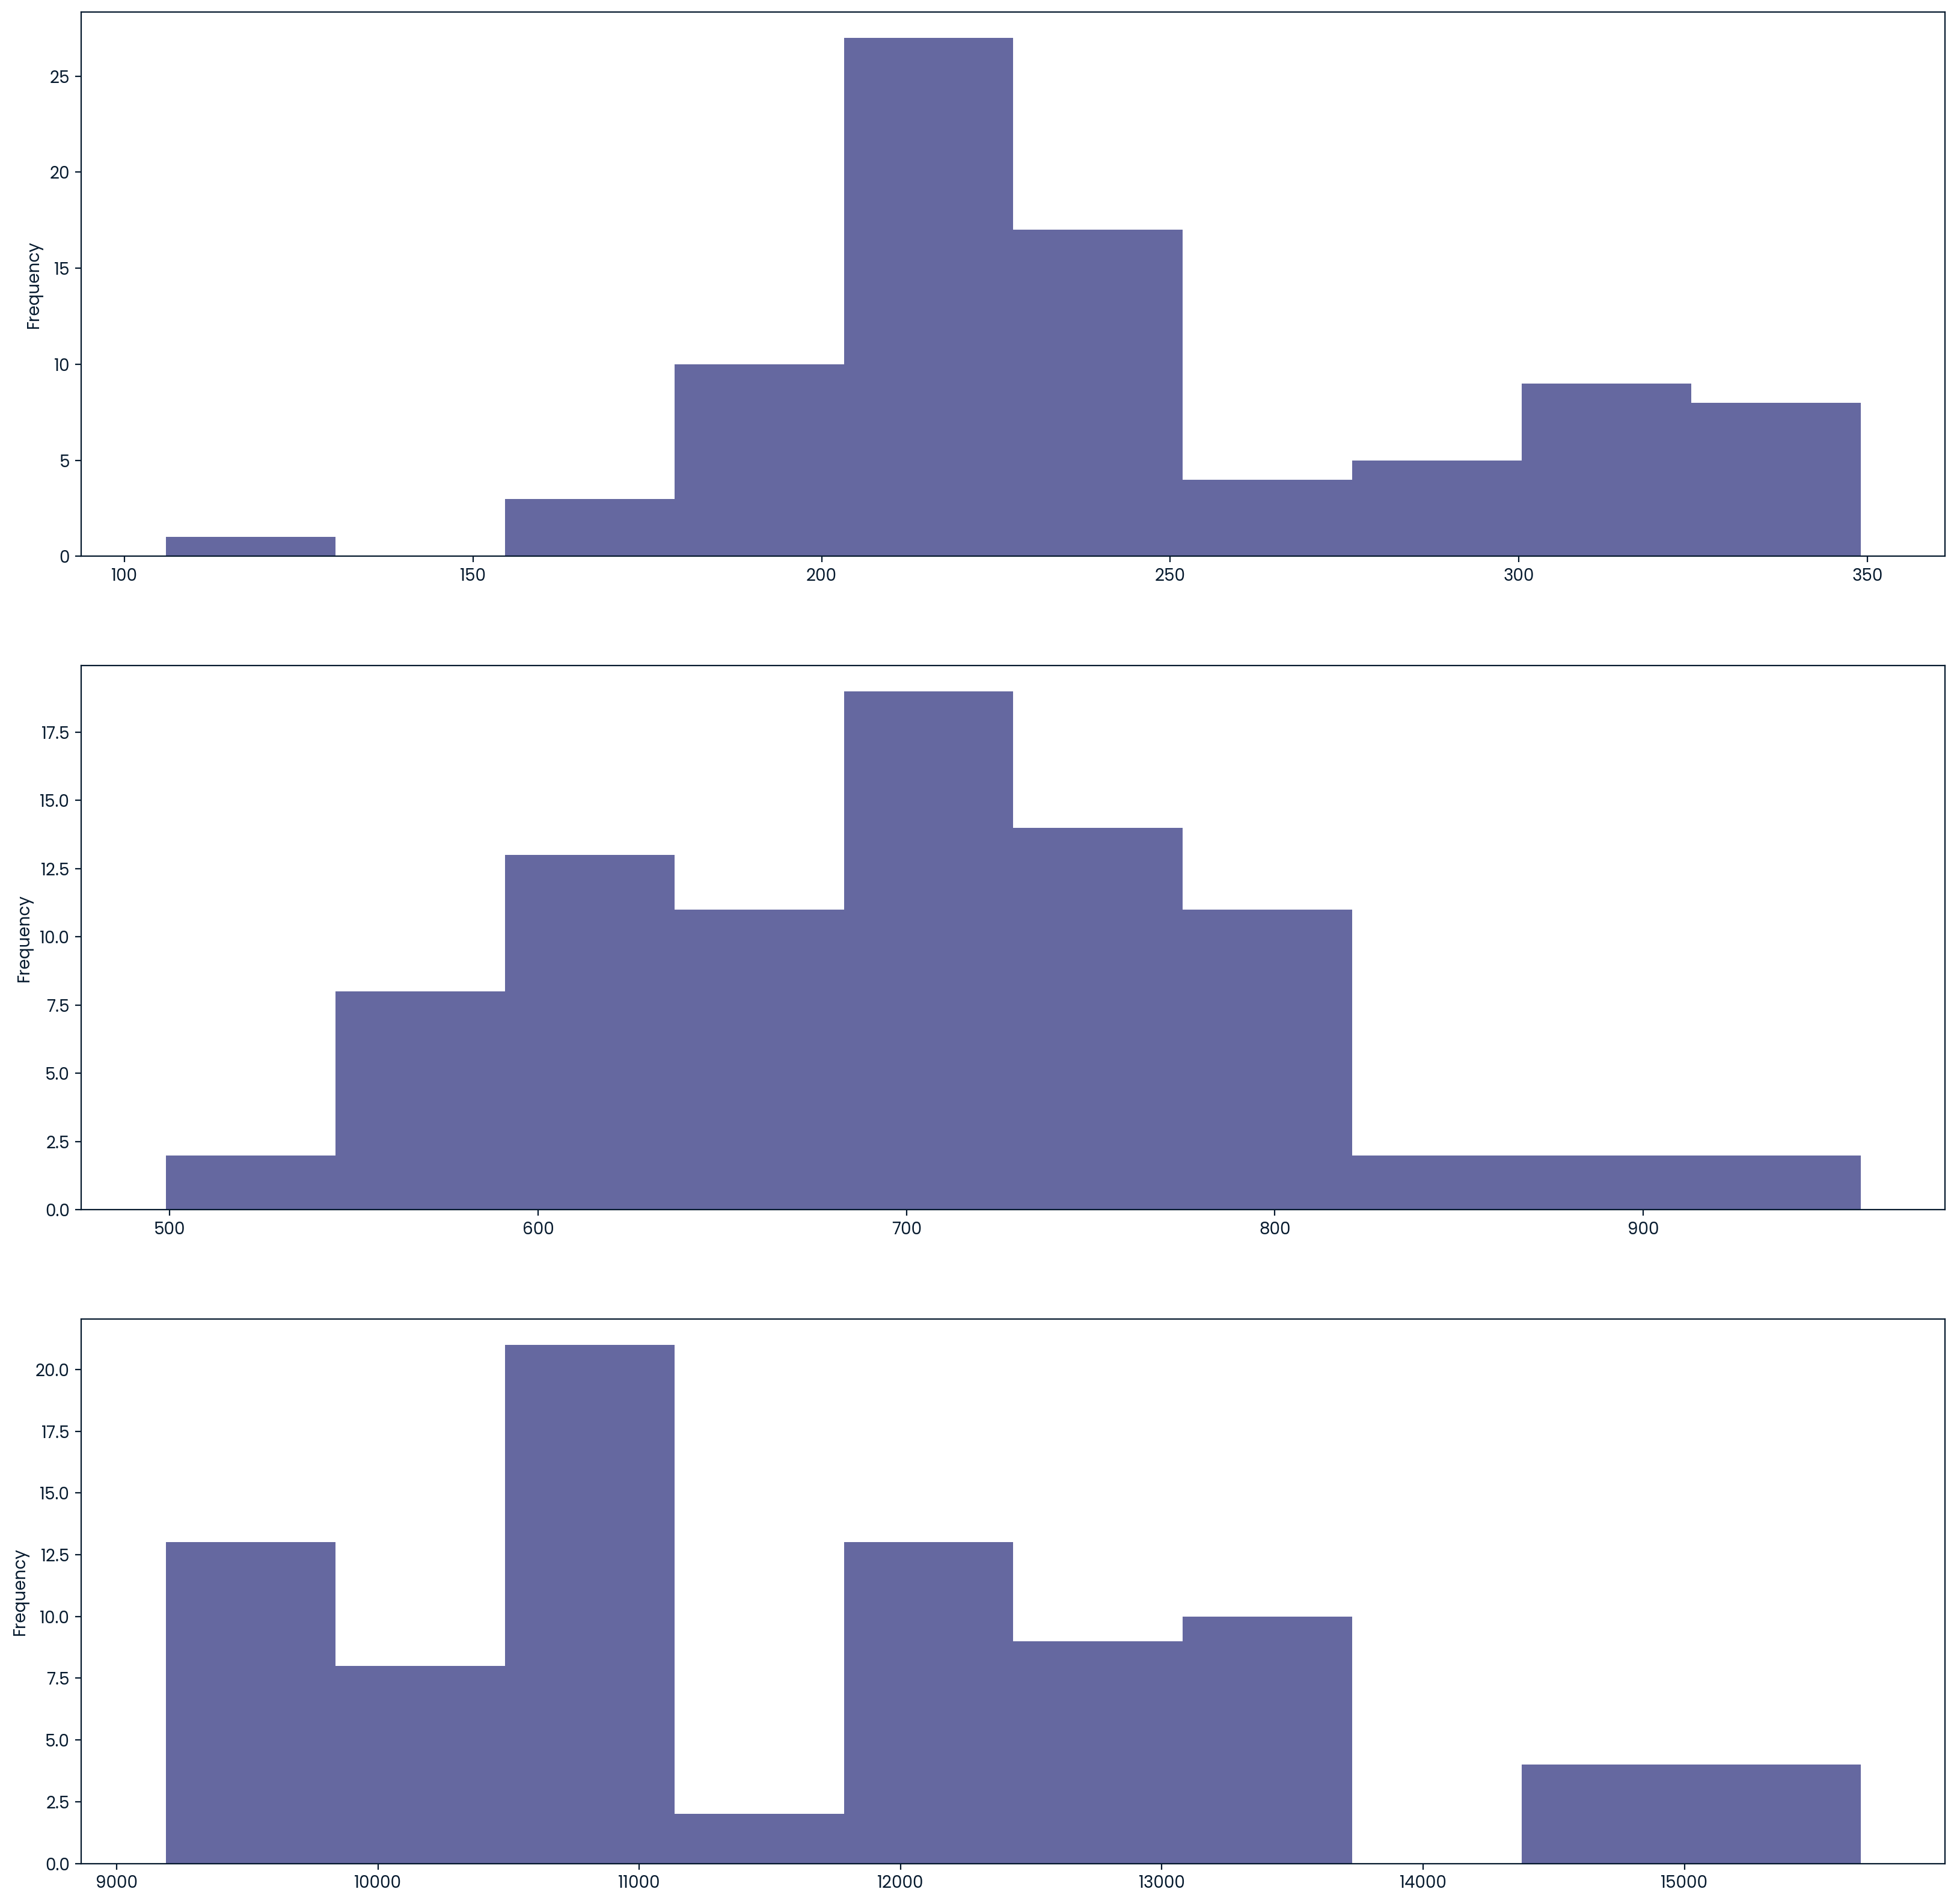

In [17]:
fig, ax = plt.subplots(3,1, figsize=(20,20))

genshin_impact['atk_90_90'].plot(kind='hist', ax=ax[0])
genshin_impact['def_90_90'].plot(kind='hist', ax=ax[1])
genshin_impact['hp_90_90'].plot(kind='hist', ax=ax[2])
plt.show()

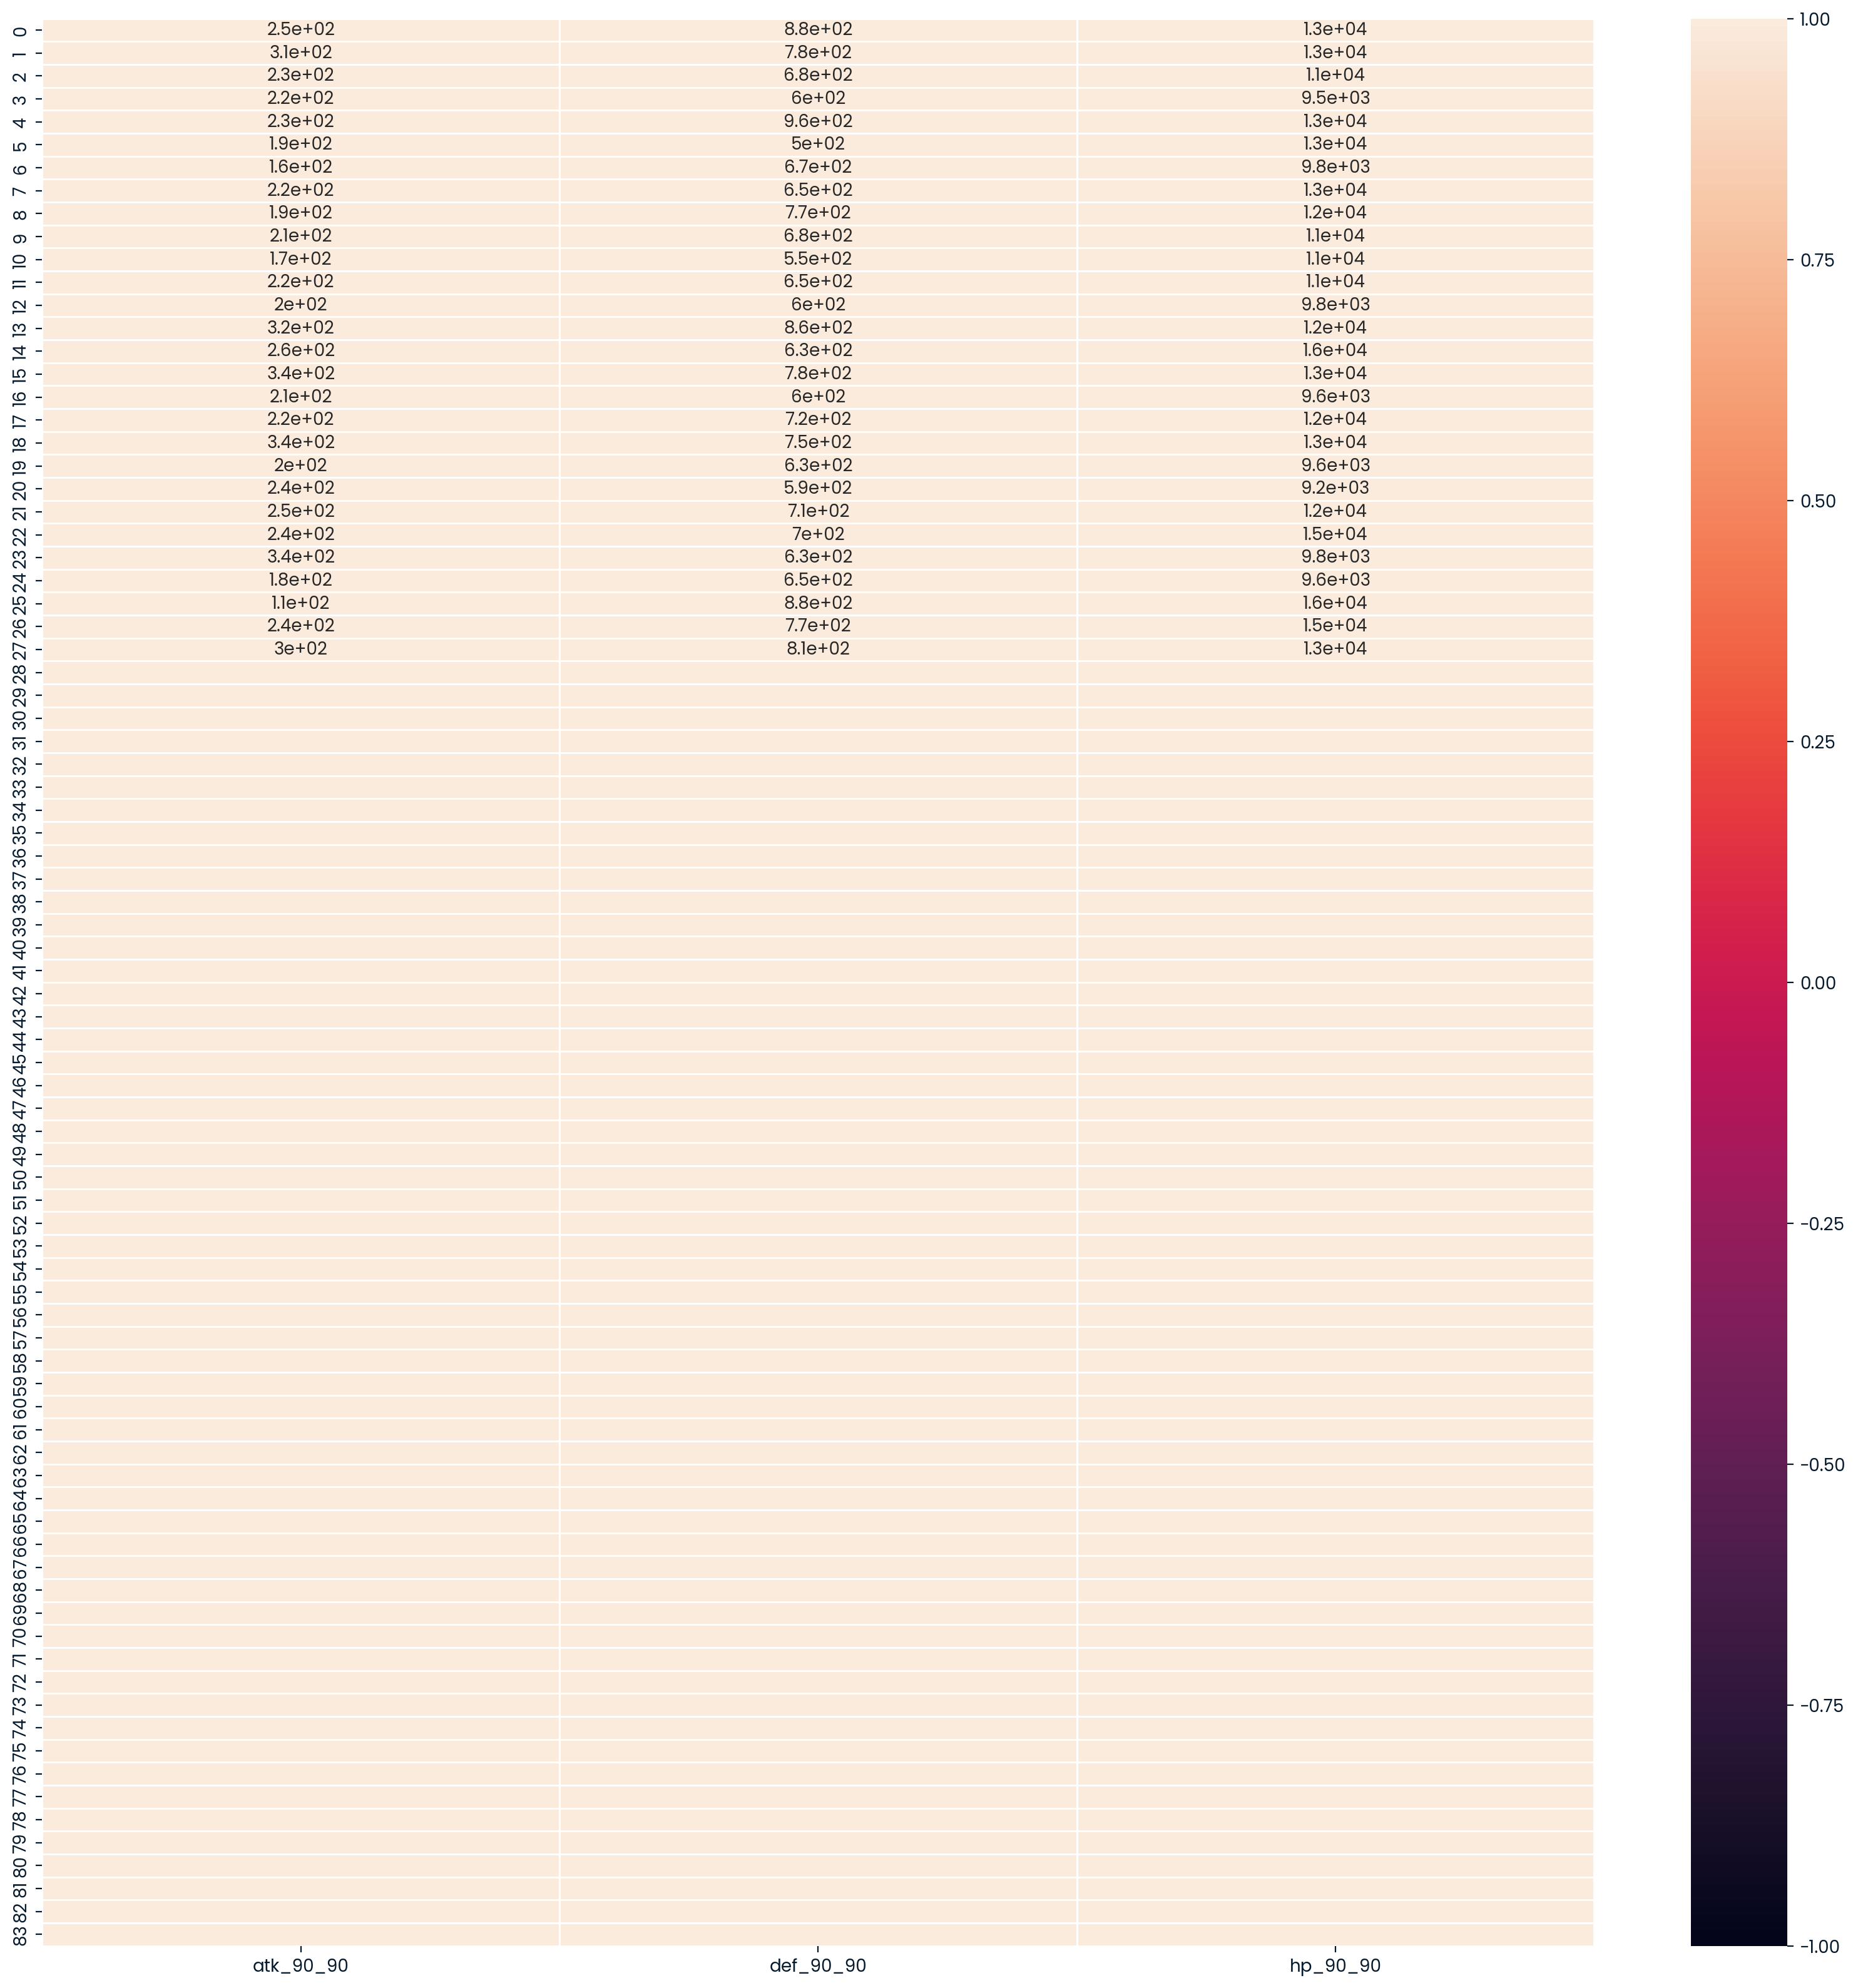

In [21]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=genshin[['atk_90_90','def_90_90','hp_90_90']],linewidths=.5, vmin=-1, vmax=1,annot = True)
plt.show()

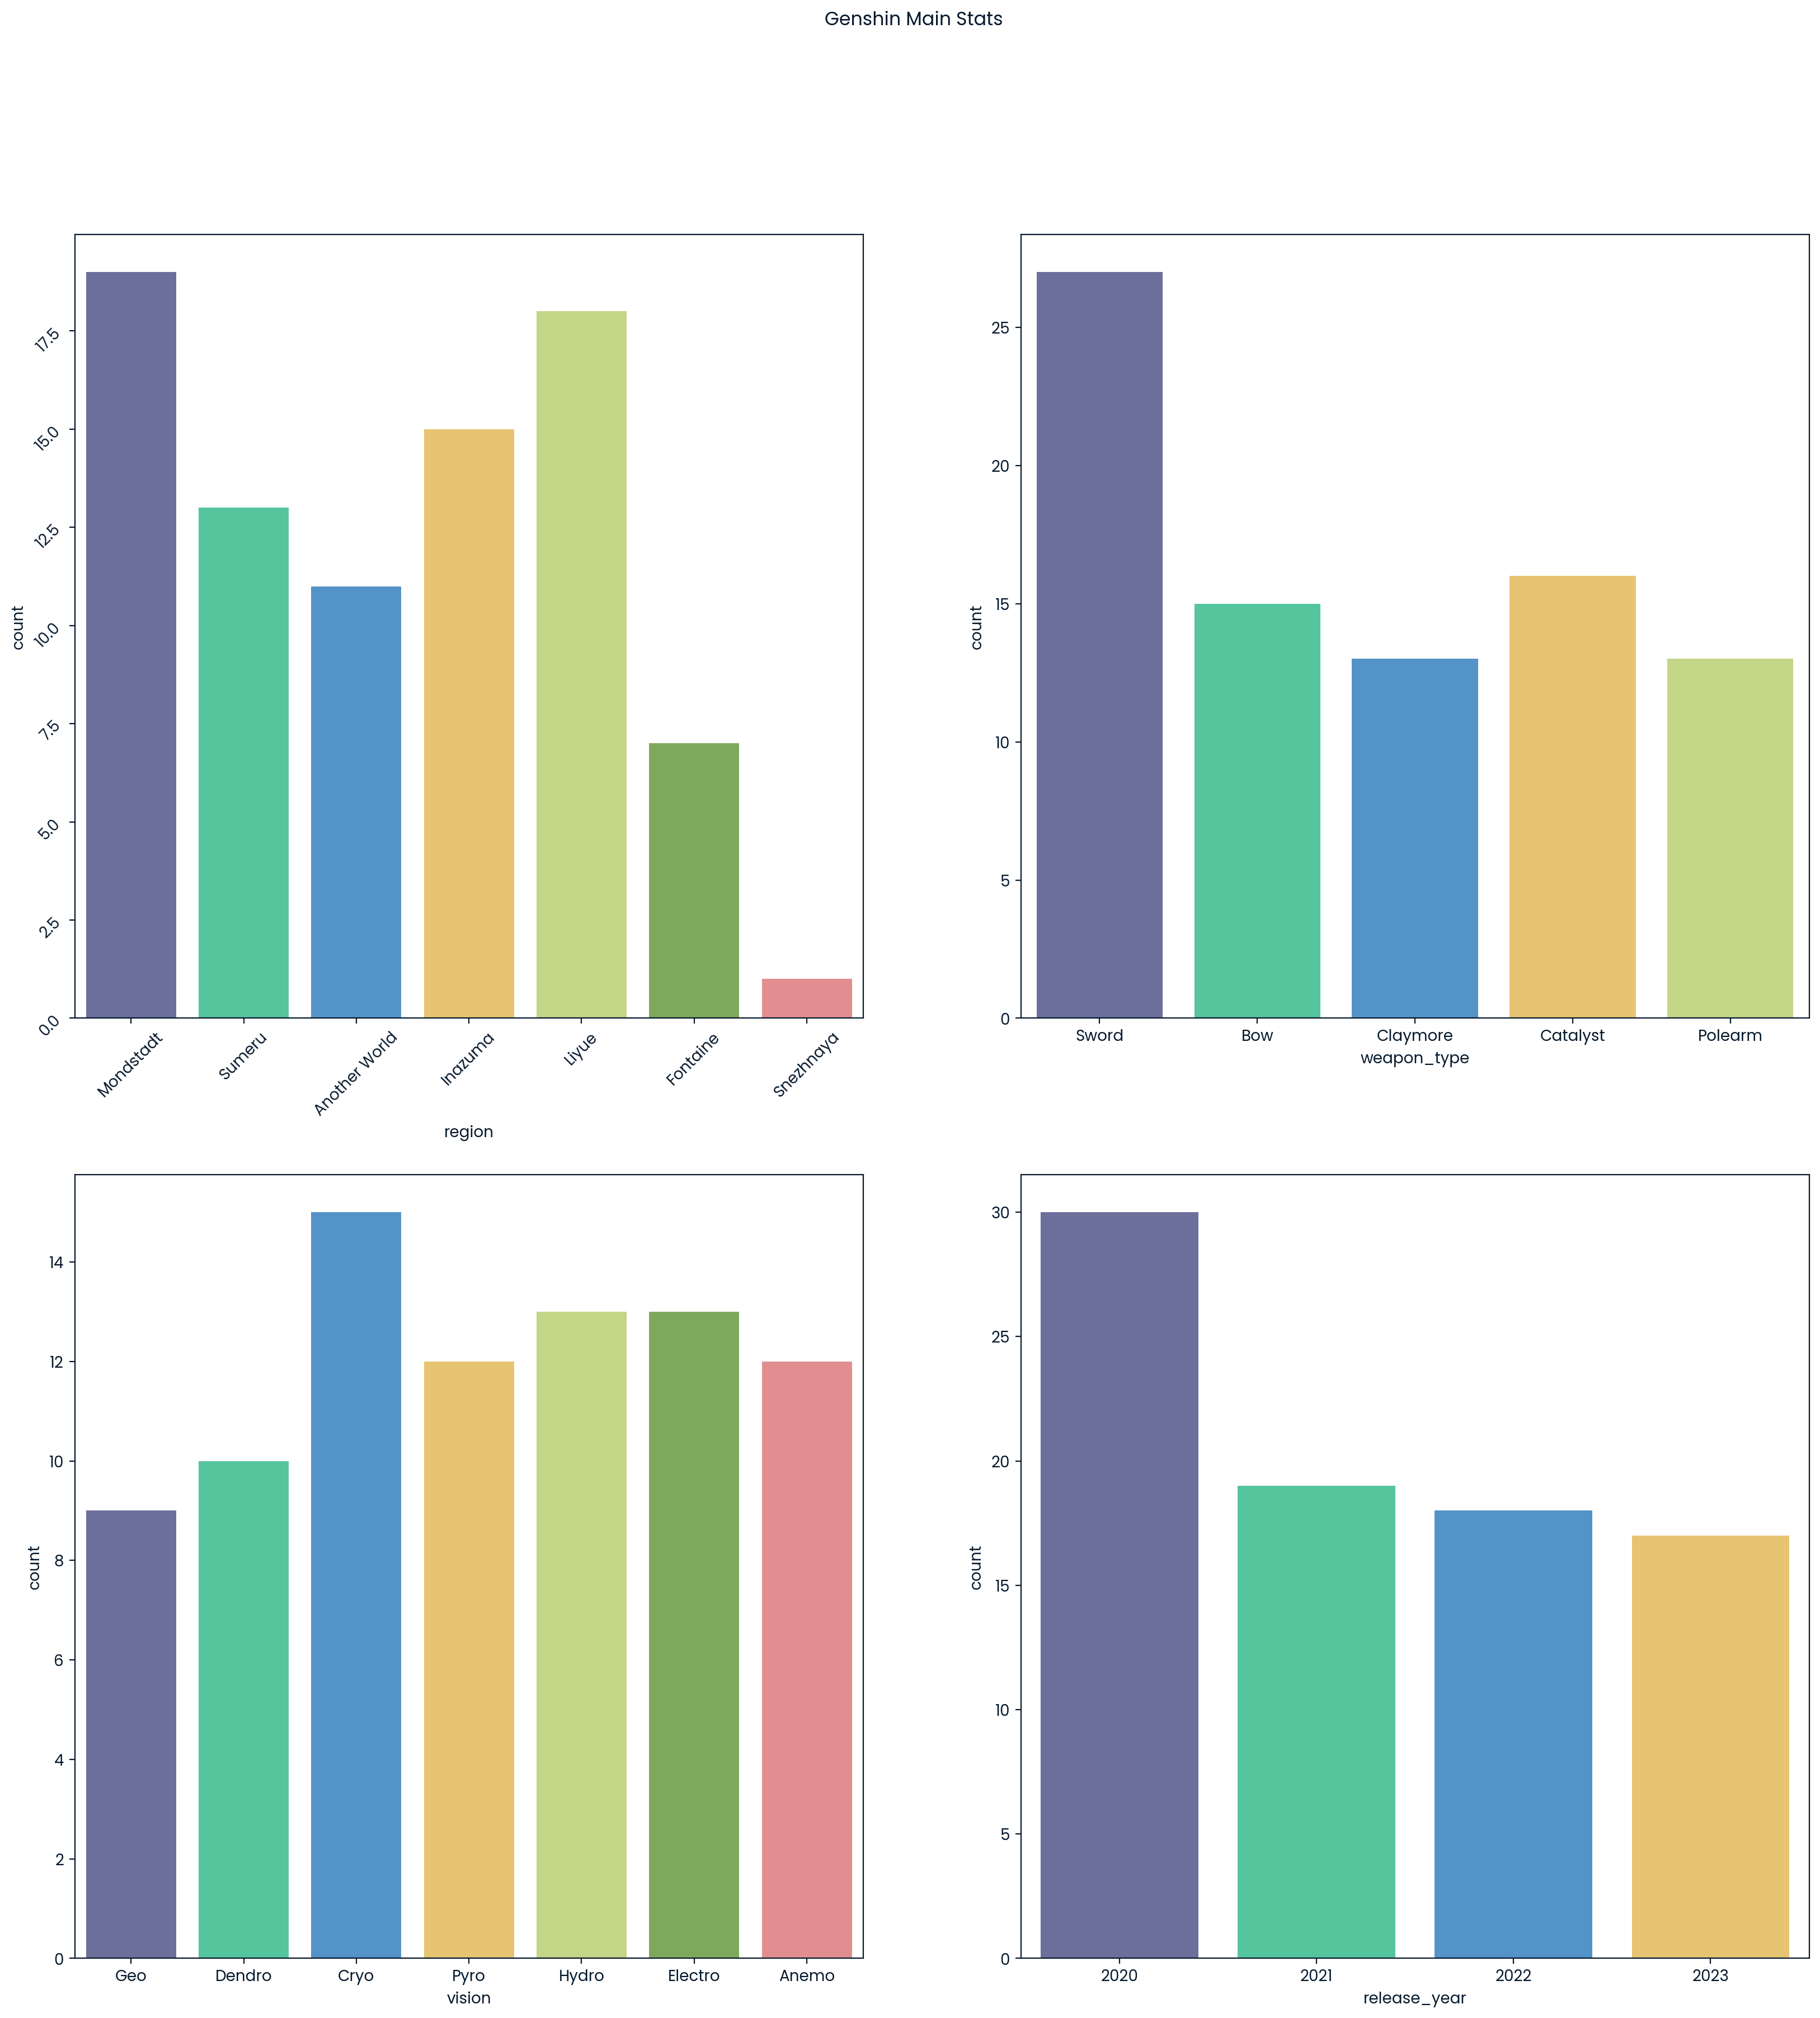

In [9]:

fig, ax = plt.subplots(2,2, figsize=(20,20))

fig.suptitle('Genshin Main Stats')
sns.color_palette('tab10')
sns.countplot(data=genshin_impact, x='region', ax=ax[0,0])
sns.countplot(data=genshin_impact, x='weapon_type', ax=ax[0,1])
sns.countplot(data=genshin_impact, x='vision', ax=ax[1,0])
sns.countplot(data=genshin_impact, x='release_year', ax=ax[1,1])

ax[0,0].tick_params(labelrotation=45)

plt.show()

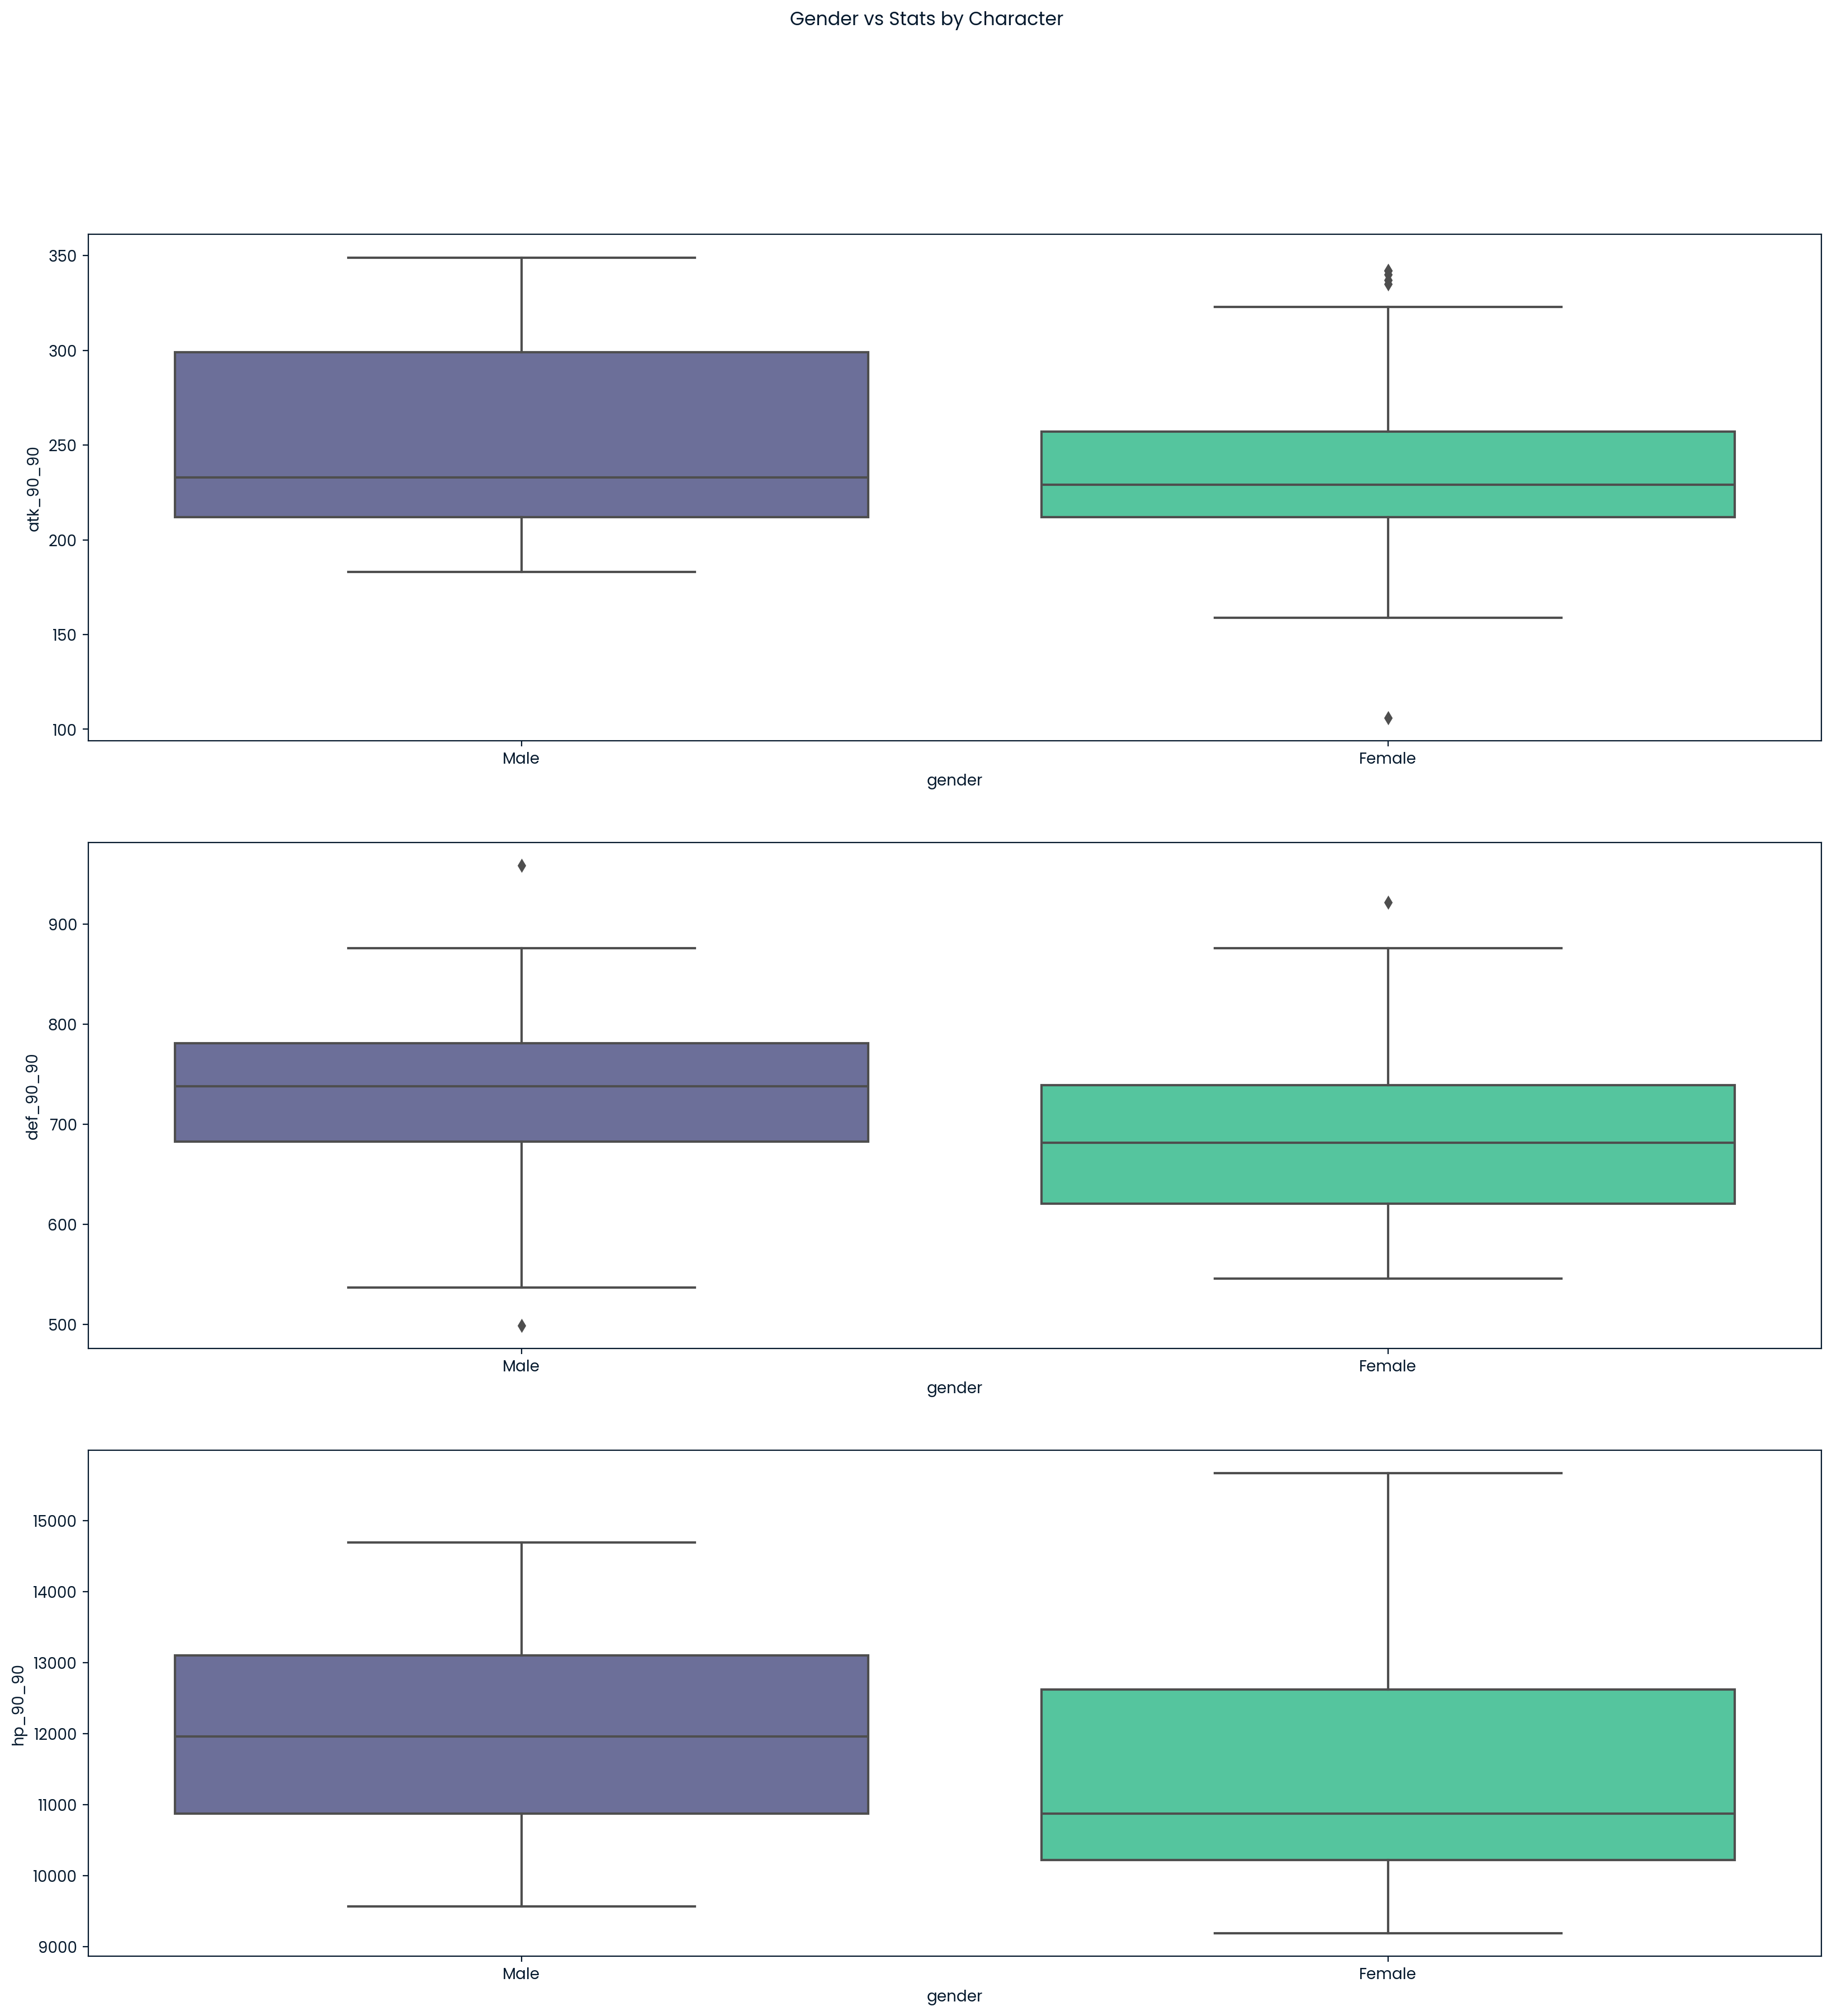

In [13]:
fig, ax = plt.subplots(3,1, figsize=(20,20))

fig.suptitle('Gender vs Stats by Character')
sns.boxplot(data=genshin_impact, x='gender',y='atk_90_90', ax=ax[0] )
sns.boxplot(data=genshin_impact, x='gender',y='def_90_90', ax=ax[1])
sns.boxplot(data=genshin_impact, x='gender',y='hp_90_90', ax=ax[2])
plt.show()

